In [4]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'fruits:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5857%2F2609027%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240423%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240423T182306Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dc682cd0b198b3b3e9ae66babad6d3e190d2aa56a6e23e4a78ce336facfdedbd565f41519f73e4e350cbfa884bd6a5d79e6457788d90a1736635ab9a475116d3d6de42dfff0b4084a668da64cb51bdc166eff030b2e443680bf9815139bf5578f2d83111a7a94a5c934266f4b0ec85e0a34e1c4cde0fe07a2964adb4fbd6df7682b05b7ffe831c33d92e778a3f4663d57439352dd117fb035d02cc5bcd0f12205941b35ee6d3ac0a22cf2fe334aafb9fdb10bcd4b8114602fe2253bfd8524c0ab86a7c771354e58b2e91b663de358bf6657a797de9c9cf571d8060dd13d8ce11d3b30a7b19a73ff9f619e926fa1b0416b588ab1c554399a7774fb6de25d17fa58'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1379678841 bytes downloaded
Downloaded and uncompressed: fruits
Data source import complete.


In [5]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'fruit-and-vegetable-image-recognition:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F952827%2F3173719%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240424%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240424T100003Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4acf9fb1e6f1c56d2f9c53d62befe11475d9d518377349103333b3b1b7f5daa4a7efea99d24344f7f61e6e1c74114b81bdfe8e70d4749b8304b70aa63ddb2de77f84c99fb02e2a654f77758c54d0c83f53e1102be86d9f836355f2d20b5e253a4ecea1d7dfc80e4be4d17c7b72297ec96647d42ca23eeb027ef0dd10fc58bc688b314ca5d23688ba5047e31982833b53f6a5f8bfbefd81584c8bbb257863e262bae1836f9fb2100f685dd03fde2e444a55931319c08a4bfe37b1146e6c01195441d404e50b1b72babc3cdaf83b411d8ab42ddd2258ab1d13c500fe243f3df9fffafef0003053a9f4e235acad74b70731de8e6d3da123926f9aeb179335a2baed'

KAGGLE_INPUT_PATH='/content/kaggle/input'
KAGGLE_WORKING_PATH='/content/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/content/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2130757290 bytes downloaded
Downloaded and uncompressed: fruit-and-vegetable-image-recognition
Data source import complete.


In [6]:
mv /kaggle/input/fruits/fruits-360_dataset/fruits-360 /content/kaggle/input

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D,MaxPooling2D
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from sklearn.datasets import load_files
from tensorflow.keras.utils import to_categorical
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator
import random

In [35]:
Training_path = '/content/kaggle/input/first/Training'
Test_path     = '/content/kaggle/input/first/Test'

firstlabels = [label for label in os.listdir(First_Training_path) if os.path.isdir(os.path.join(First_Training_path, label))]
firstlabels.sort()
# Print the labels
print("Labels in the folder set:")
for label in firstlabels:
    print(label)


Labels in the folder set:
apple
apricot
avocado
banana
beetroot
bell pepper
blueberry
cabbage
cactus
cantaloupe
capsicum
carambula
carrot
cauliflower
cherry
chestnut
chilli pepper
clementine
coconut
corn
cucumber
dates
eggplant
fig
garlic
ginger
granadilla
grapefruit
grapes
guava
hazelnut
huckleberry
jalepeno
kaki
kiwi
kohlrabi
kumquat
lemon
lettuce
lime
lychee
mandarin
mango
mangosteen
melon
mulberry
nectarine
nut
onion
orange
papaya
paprika
passion fruit
peach
pear
peas
pepino
physalis
pineapple
pitahaya
plum
pomegranate
pomelo
potato
quince
raddish
rambutan
raspberry
redcurrant
salak
soy beans
spinach
strawberry
sweetcorn
sweetpotato
tamarillo
tangelo
tomato
turnip
walnut
watermelon


In [25]:
label_mapping = {
    "Apple Braeburn": "apple",
    "Apple Crimson Snow": "apple",
    "Apple Golden 1": "apple",
    "Apple Golden 2": "apple",
    "Apple Golden 3": "apple",
    "Apple Granny Smith": "apple",
    "Apple Pink Lady": "apple",
    "Apple Red 1": "apple",
    "Apple Red 2": "apple",
    "Apple Red 3": "apple",
    "Apple Red Delicious": "apple",
    "Apple Red Yellow 1": "apple",
    "Apple Red Yellow 2": "apple",
    "Apricot": "apricot",
    "Avocado": "avocado",
    "Avocado ripe": "avocado",
    "Banana": "banana",
    "Banana Lady Finger": "banana",
    "Banana Red": "banana",
    "Beetroot": "beetroot",
    "Blueberry": "blueberry",
    "Cactus fruit": "cactus",
    "Cantaloupe 1": "cantaloupe",
    "Cantaloupe 2": "cantaloupe",
    "Carambula": "carambula",
    "Cauliflower": "cauliflower",
    "Cherry 1": "cherry",
    "Cherry 2": "cherry",
    "Cherry Rainier": "cherry",
    "Cherry Wax Black": "cherry",
    "Cherry Wax Red": "cherry",
    "Cherry Wax Yellow": "cherry",
    "Chestnut": "chestnut",
    "Clementine": "clementine",
    "Cocos": "coconut",
    "Corn": "corn",
    "Corn Husk": "corn",
    "Cucumber Ripe": "cucumber",
    "Cucumber Ripe 2": "cucumber",
    "Dates": "dates",
    "Eggplant": "eggplant",
    "Fig": "fig",
    "Ginger Root": "ginger",
    "Granadilla": "granadilla",
    "Grape Blue": "grapes",
    "Grape Pink": "grapes",
    "Grape White": "grapes",
    "Grape White 2": "grapes",
    "Grape White 3": "grapes",
    "Grape White 4": "grapes",
    "Grapefruit Pink": "grapefruit",
    "Grapefruit White": "grapefruit",
    "Guava": "guava",
    "Hazelnut": "hazelnut",
    "Huckleberry": "huckleberry",
    "Kaki": "kaki",
    "Kiwi": "kiwi",
    "Kohlrabi": "kohlrabi",
    "Kumquats": "kumquat",
    "Lemon": "lemon",
    "Lemon Meyer": "lemon",
    "Limes": "lime",
    "Lychee": "lychee",
    "Mandarine": "mandarin",
    "Mango": "mango",
    "Mango Red": "mango",
    "Mangostan": "mangosteen",
    "Maracuja": "passion fruit",
    "Melon Piel de Sapo": "melon",
    "Mulberry": "mulberry",
    "Nectarine": "nectarine",
    "Nectarine Flat": "nectarine",
    "Nut Forest": "nut",
    "Nut Pecan": "nut",
    "Onion Red": "onion",
    "Onion Red Peeled": "onion",
    "Onion White": "onion",
    "Orange": "orange",
    "Papaya": "papaya",
    "Passion Fruit": "passion fruit",
    "Peach": "peach",
    "Peach 2": "peach",
    "Peach Flat": "peach",
    "Pear": "pear",
    "Pear 2": "pear",
    "Pear Abate": "pear",
    "Pear Forelle": "pear",
    "Pear Kaiser": "pear",
    "Pear Monster": "pear",
    "Pear Red": "pear",
    "Pear Stone": "pear",
    "Pear Williams": "pear",
    "Pepino": "pepino",
    "Pepper Green": "bell pepper",
    "Pepper Orange": "bell pepper",
    "Pepper Red": "bell pepper",
    "Pepper Yellow": "bell pepper",
    "Physalis": "physalis",
    "Physalis with Husk": "physalis",
    "Pineapple": "pineapple",
    "Pineapple Mini": "pineapple",
    "Pitahaya Red": "pitahaya",
    "Plum": "plum",
    "Plum 2": "plum",
    "Plum 3": "plum",
    "Pomegranate": "pomegranate",
    "Pomelo Sweetie": "pomelo",
    "Potato Red": "potato",
    "Potato Red Washed": "potato",
    "Potato Sweet": "sweetpotato",
    "Potato White": "potato",
    "Quince": "quince",
    "Rambutan": "rambutan",
    "Raspberry": "raspberry",
    "Redcurrant": "redcurrant",
    "Salak": "salak",
    "Strawberry": "strawberry",
    "Strawberry Wedge": "strawberry",
    "Tamarillo": "tamarillo",
    "Tangelo": "tangelo",
    "Tomato 1": "tomato",
    "Tomato 2": "tomato",
    "Tomato 3": "tomato",
    "Tomato 4": "tomato",
    "Tomato Cherry Red": "tomato",
    "Tomato Heart": "tomato",
    "Tomato Maroon": "tomato",
    "Tomato Yellow": "tomato",
    "Tomato not Ripened": "tomato",
    "Walnut": "walnut",
    "Watermelon": "watermelon"
}

len(label_mapping)

131

In [31]:
directory_path = '/content/kaggle/input/second/validation'

# Loop through each folder in the directory
for folder_name in os.listdir(directory_path):
    # Check if the folder is in the label mapping
    if folder_name in label_mapping:
        # Get the new folder name from the mapping
        new_folder_name = label_mapping[folder_name]
        # Check if the new folder name already exists
        if os.path.exists(os.path.join(directory_path, new_folder_name)):
            # Merge folders if they would have the same name
            source = os.path.join(directory_path, folder_name)
            destination = os.path.join(directory_path, new_folder_name)
            for file_name in os.listdir(source):
                # Check if file with the same name already exists in destination folder
                if os.path.exists(os.path.join(destination, file_name)):
                    # Generate a new name for the file to avoid conflict
                    base_name, extension = os.path.splitext(file_name)
                    new_file_name = f"{base_name}_renamed{extension}"
                    shutil.move(os.path.join(source, file_name), os.path.join(destination, new_file_name))
                else:
                    shutil.move(os.path.join(source, file_name), destination)
            os.rmdir(source)  # Remove the empty source folder
        else:
            # Rename the folder to the new name
            os.rename(os.path.join(directory_path, folder_name), os.path.join(directory_path, new_folder_name))

In [34]:
import os
import shutil

# Define source and destination directories
source_directory = '/content/kaggle/input/second/validation'
destination_directory = '/content/kaggle/input/first/Test'

# Create the destination directory if it doesn't exist
os.makedirs(destination_directory, exist_ok=True)

# Loop through each folder in the source directory
for folder_name in os.listdir(source_directory):
    # Construct the full path to the source folder
    source_folder = os.path.join(source_directory, folder_name)

    # If the path is not a directory, skip it
    if not os.path.isdir(source_folder):
        continue

    # Loop through each file in the source folder
    for file_name in os.listdir(source_folder):
        # Construct the full path to the source file
        source_file = os.path.join(source_folder, file_name)

        # Construct the full path to the destination folder
        destination_folder = os.path.join(destination_directory, folder_name)

        # Create the destination folder if it doesn't exist
        os.makedirs(destination_folder, exist_ok=True)

        # Check if the file already exists in the destination folder
        destination_file = os.path.join(destination_folder, file_name)
        if os.path.exists(destination_file):
            # If the file already exists, rename it before moving
            base_name, extension = os.path.splitext(file_name)
            new_file_name = f"{base_name}_renamed{extension}"
            destination_file = os.path.join(destination_folder, new_file_name)

        # Move the file to the destination folder
        shutil.move(source_file, destination_file)

# Remove empty source folders
for folder_name in os.listdir(source_directory):
    source_folder = os.path.join(source_directory, folder_name)
    if os.path.isdir(source_folder) and not os.listdir(source_folder):
        os.rmdir(source_folder)

print("Files moved and merged successfully!")


Files moved and merged successfully!


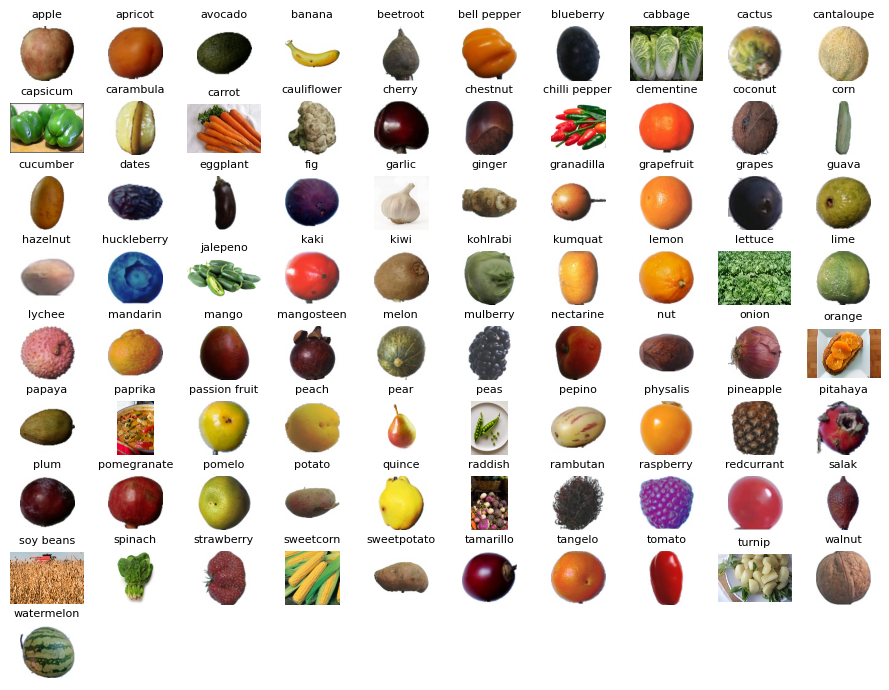

In [37]:
plt.figure(figsize=(9 , 10))
for i in range(len(firstlabels)):
  path = []
  for x in os.listdir(os.path.join(Training_path, firstlabels[i])):
    path.append(x)
  img = mpimg.imread(os.path.join(Training_path,firstlabels[i], path[random.randint(0, len(path))]))
  #img = image_resize_rescale(img)
  plt.subplot(13, 10, i + 1)
  plt.title(firstlabels[i], fontsize=8)
  plt.axis('off')
  plt.imshow(img)
plt.tight_layout(h_pad=0.3)
plt.show()

In [38]:
path = '/content/kaggle/input/first'
TrainLabels  = []
TestLabels   = []
TrainSamples = []
TestSamples  = []
for i in os.listdir(os.path.join(path + '/Training/')):
  TrainLabels.append(i)
  TrainSamples.append(len(os.listdir(os.path.join(path + '/Training/' + i))))

for i in os.listdir(os.path.join(path + '/Test/')):
  TestLabels.append(i)
  TestSamples.append(len(os.listdir(os.path.join(path + '/Test/' + i))))

TrainLabels.sort()
TestLabels.sort()
print('(Train,Test)')
for i in range(len(TrainLabels)):
    print(f'No. Samples of {TrainLabels[i]}: ({TrainSamples[i]},{TestSamples[i]})')


(Train,Test)
No. Samples of apple: (984,328)
No. Samples of apricot: (1064,350)
No. Samples of avocado: (738,246)
No. Samples of banana: (92,20)
No. Samples of beetroot: (82,19)
No. Samples of bell pepper: (490,166)
No. Samples of blueberry: (300,102)
No. Samples of cabbage: (97,19)
No. Samples of cactus: (490,166)
No. Samples of cantaloupe: (984,328)
No. Samples of capsicum: (450,153)
No. Samples of carambula: (450,153)
No. Samples of carrot: (1363,500)
No. Samples of cauliflower: (490,166)
No. Samples of cherry: (91,20)
No. Samples of chestnut: (81,19)
No. Samples of chilli pepper: (1838,824)
No. Samples of clementine: (918,309)
No. Samples of coconut: (490,166)
No. Samples of corn: (1525,597)
No. Samples of cucumber: (559,177)
No. Samples of dates: (490,166)
No. Samples of eggplant: (98,20)
No. Samples of fig: (492,164)
No. Samples of garlic: (552,176)
No. Samples of ginger: (972,324)
No. Samples of granadilla: (980,332)
No. Samples of grapefruit: (490,166)
No. Samples of grapes: (3

In [39]:
Training_path = '/content/kaggle/input/first/Training'
Test_path     = '/content/kaggle/input/first/Test'

img_height = 100
img_width  = 100
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


train_generator = datagen.flow_from_directory(
    Training_path,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    Test_path,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = datagen.flow_from_directory(
    Test_path,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)


Found 54396 images belonging to 81 classes.
Found 21015 images belonging to 81 classes.
Found 21015 images belonging to 81 classes.


In [40]:
model = Sequential()
model.add(InputLayer(input_shape=(img_height,img_width,3)))
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=(5,5), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(131, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      1216      
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        12832     
                                                                 
 batch_normalization_1 (Batc  (None, 50, 50, 32)       128       
 hNormalization)                                                 
                                                        

In [45]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('MyFavModel.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6, verbose=1)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
HISTORY =  model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=25,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

Epoch 1/25
 4/97 [>.............................] - ETA: 2:11 - loss: 12.0145 - accuracy: 0.0391

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


27/97 [=======>......................] - ETA: 2:19 - loss: 6.6882 - accuracy: 0.0440

KeyboardInterrupt: 

In [ ]:
test_loss, test_acc = model.evaluate_generator(test_generator)
print('Test accuracy:', test_acc)

<ipython-input-73-a2badb58ea3e>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator)


Test accuracy: 0.9841325879096985


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to your single image
image_path = '/content/apple.jpg'

# Load the image and resize it to the target size
img = image.load_img(image_path, target_size=(100, 100,3))  # Assuming target size is (100, 100)

# Convert the image to an array and rescale pixel values
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Rescale pixel values

# Add an extra dimension to match the input shape of the model
img_array = np.expand_dims(img_array, axis=0)

# Now, you can input this preprocessed image into your model for prediction
prediction = model.predict(img_array)

# Depending on your model output, you can interpret the prediction accordingly
# For example, if your model predicts probabilities for each class, you can get the predicted class like this:
predicted_class_index = np.argmax(prediction)
print(labels[predicted_class_index])

1/1 [==============================] - 0s 29ms/step
Pear Abate
